In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#!pip install azureml-core
#!pip install gensim
#!pip install regex
#!pip install graphviz
#!pip install pydotplus

In [ ]:
from __future__ import print_function
import numpy as np
from six.moves import zip
import json
import warnings
import pandas as pd
from pandas import DataFrame   
import pickle
import re
import sys 
import azureml
import string
from scipy import stats
import pip
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer     
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers.core import Dropout
from keras.layers import LSTM
from keras.layers import Dense, Input, Flatten 
from keras.layers import Conv1D, MaxPooling1D, Embedding 
from keras.models import Model 
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.models import load_model
from keras.applications import imagenet_utils
from keras.layers import Embedding
from keras.utils.np_utils import to_categorical
from keras import initializers
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras import initializers 
from keras import regularizers 
from keras import constraints 
from keras.layers import Activation
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import ELU
from keras.constraints import max_norm
import keras.backend as K
import os
import tempfile  
import logging
import gensim
from gensim.models import Phrases, phrases
from gensim.models.phrases import Phraser
from gensim.models import Word2Vec as wv
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models, similarities
from IPython.display import SVG
import cloudpickle
import csv
#import mkl
import matplotlib.pyplot as plt
import h5py
from keras.models import load_model
import re
import io
from os.path import dirname, join
import regex
import graphviz
import pydotplus
import pyparsing
from keras.utils import plot_model
from bs4 import BeautifulSoup
import re

Using TensorFlow backend.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.3


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
np.random.seed(1337)  # for reproducibility

In [ ]:
#x = pd.read_csv('inspection_sas.csv')
x = pd.read_csv('unstructure.csv')
x = x[['facility_id','inspection_text']]

In [ ]:
label = pd.read_csv('label.csv')

In [ ]:
label['label'] = label['High Risk'] - label['Low Risk']
label['label'] = label['label'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
label = label[['Federal Provider Number','avg_weekly_covid19_death_per_occupied_bed_pct_aggregate_max_final','label']]

In [ ]:
x = pd.merge(x, label, how='inner',  left_on='facility_id', right_on='Federal Provider Number')

In [ ]:
################################
# Convert labels to categorical
################################


inspectiontexts = x['inspection_text']
print('inspection text: ', inspectiontexts.head(5))

labels=pd.DataFrame(x['label'])
print('head of labels',labels.head(5))
print(labels['label'].unique())


###################################################
# Set Global Vars
####################################################

MAX_SEQUENCE_LENGTH = 10000
MAX_NB_WORDS = 400000
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2
LEARNING_RATE = .00011
BATCH_SIZE = 32
DROPOUT_RATE = 0.45
INNERLAYER_DROPOUT_RATE = 0.15
np.random.seed(2032)

#change directory to write results
BASE_DIR = '.'
GLOVE_DIR = BASE_DIR 

inspection text:  0    based clinical review documentation interview ...
1    based observation interview documentation 7 re...
2    based clinical record documentation policy int...
3    based clinical documentation policy interview ...
4    based observation documentation interview 32 r...
Name: inspection_text, dtype: object
head of labels    label
0      1
1      1
2      1
3      1
4      1
[1 0]


In [ ]:
######################################################
# Format our text samples and labels for use in Keras
######################################################
# Then we can format our text samples and labels into tensors that can be fed into a neural network. 
# Here we tokenize our source 'justcleandocs'
# note that the values here are ultimately indexes to the actual words

#convert text format
textslist  = inspectiontexts.values
textslist[6]
labelslist  = labels.values
labels_index = {}
#labels_index =  {0:0,1:1,2:2,3:3,4:4}
labels_index =  {0:0,1:1}
print('labels_index', labels_index)

#tokenize the text
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(textslist) #tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(textslist) #sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index #word_index = tokenizer.word_index
print('Found {} unique tokens'.format(len(word_index)))
#print('sequences first', sequences[0])

#Pad sequences so that they all have the same length in a batch of input data 
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', truncating='pre')
sequences = None
texts = None

labels_index {0: 0, 1: 1}
Found 405707 unique tokens


In [ ]:
##################################################
#build label array from target y label in data set
##################################################
labels = to_categorical(np.asarray(labels))
print('Shape of data tensor: ', data.shape)
print('Shape of label tensor: ', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

X_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
X_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

print('length of y_val',len(y_val))
print('shape of y_val',y_val.shape)
print('length of X_val',len(X_val))
print('shape of X_val',X_val.shape)



Shape of data tensor:  (111797, 10000)
Shape of label tensor:  (111797, 2)
length of y_val 22359
shape of y_val (22359, 2)
length of X_val 22359
shape of X_val (22359, 10000)


In [ ]:
#####################################
# Save Validation Set for Evaluation
####################################
np.savetxt('y_val.txt', y_val, delimiter=',')
np.savetxt('X_val.txt', X_val,  fmt='%s', delimiter=',')
print('test and training sets saved to disk for later evaluation')

test and training sets saved to disk for later evaluation


In [ ]:
########################################
# Preparing the embedding layer
########################################

#load in word vectors from glove reference global English data set
# https://nlp.stanford.edu/projects/glove/
# see more reference links at bottom

print('Loading word vectors to prepare the embedding layer...')


embeddings_index = {}
print('Loading Glove Model...')
gloveFile = 'glove.6B.300d.txt'
words = pd.read_table(gloveFile, sep=" ", header=None, quoting=csv.QUOTE_NONE)

print(words.head(5))
print('shape of glove model',words.shape)

wordkeys=words.iloc[:,0]
print('wordkeys type of file', type(wordkeys))
words2 = words.rename(columns={ words.columns[0]: "words" })
words2['words'].apply(str)
#print(words2.dtypes)

embeddings_index = words2.set_index('words').T.to_dict('list')

#print(dict(list(embeddings_index.items())[0:2]))
print('Found {} word vectors.'.format(len(embeddings_index)))
#usage of pandas function dataFrame.to_dict(outtype='dict') outtype : str {‘dict’, ‘list’, ‘series’}

Loading word vectors to prepare the embedding layer...
Loading Glove Model...
   0         1         2         3         4         5         6         7    \
0  the  0.046560  0.213180 -0.007436 -0.458540 -0.035639  0.236430 -0.288360   
1    , -0.255390 -0.257230  0.131690 -0.042688  0.218170 -0.022702 -0.178540   
2    . -0.125590  0.013630  0.103060 -0.101230  0.098128  0.136270 -0.107210   
3   of -0.076947 -0.021211  0.212710 -0.722320 -0.139880 -0.122340 -0.175210   
4   to -0.257560 -0.057132 -0.671900 -0.380820 -0.364210 -0.082155 -0.010955   

        8         9    ...       291       292       293       294       295  \
0  0.215210 -0.134860  ... -0.013064 -0.296860 -0.079913  0.195000  0.031549   
1  0.107560  0.058936  ...  0.075968 -0.014359 -0.073794  0.221760  0.146520   
2  0.236970  0.328700  ...  0.060148 -0.156190 -0.119490  0.234450  0.081367   
3  0.121370 -0.070866  ... -0.366730 -0.386030  0.302900  0.015747  0.340360   
4 -0.082047  0.460560  ... -0.012806 -0.5

In [ ]:
#################################
#Build the embedding matrix
#################################

print('Building Embedding Matrix...')
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

Building Embedding Matrix...


In [ ]:
##############################################
#Training a 1D convnet
##############################################

print('Train 1D Convnet with global maxpooling')
print('Shape of training data sample tensor: ', X_train.shape)
print('Shape of training label tensor: ', y_train.shape)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')


embedded_sequences = embedding_layer(sequence_input)

def getPreds(embedded_sequences):
    x = Conv1D(128, 5, activation='elu', kernel_initializer='lecun_uniform')(embedded_sequences)
    x = MaxPooling1D(5)(x)
    x = Dropout(INNERLAYER_DROPOUT_RATE)(x)

    x = Conv1D(128, 5, activation='elu', kernel_initializer='lecun_uniform')(x)
    x = MaxPooling1D(5)(x)
    x = Dropout(INNERLAYER_DROPOUT_RATE)(x)

    x = Conv1D(128, 5, activation='elu', kernel_initializer='lecun_uniform')(x)
    x = MaxPooling1D(35)(x)  # global max pooling

    x = Flatten()(x)
    x = Dense(100, activation='elu', kernel_initializer='lecun_uniform')(x) # best initializers: #glorot_normal #VarianceScaling #lecun_uniform
    x = Dropout(DROPOUT_RATE)(x)

    preds = Dense(len(labels_index), activation='softmax')(x) #no initialization in output layer
    return preds

preds = getPreds(embedded_sequences)

model = Model(sequence_input, preds)

Train 1D Convnet with global maxpooling
Shape of training data sample tensor:  (89438, 10000)
Shape of training label tensor:  (89438, 2)


In [ ]:
################################
#Compile model, set optimizers
################################ 

adam = optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, clipvalue=0.5)#, clipnorm=1.)
rmsprop = optimizers.RMSprop(lr=LEARNING_RATE, rho=0.9, epsilon=1e-08, decay=0.00)

model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])
from keras.callbacks import History 
history = History()

early_stopping = EarlyStopping(monitor='val_loss', patience=30)

history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=24,
          validation_data=(X_val, y_val), callbacks=[early_stopping, history])



Train on 89438 samples, validate on 22359 samples
Epoch 1/24
89438/89438 [==============================] - 519s 6ms/step - loss: 0.6283 - acc: 0.6825 - val_loss: 0.6257 - val_acc: 0.6852
Epoch 2/24
89438/89438 [==============================] - 518s 6ms/step - loss: 0.6245 - acc: 0.6828 - val_loss: 0.6189 - val_acc: 0.6852
Epoch 3/24
89438/89438 [==============================] - 518s 6ms/step - loss: 0.6168 - acc: 0.6844 - val_loss: 0.6136 - val_acc: 0.6850
Epoch 4/24
89438/89438 [==============================] - 518s 6ms/step - loss: 0.6067 - acc: 0.6885 - val_loss: 0.6109 - val_acc: 0.6854
Epoch 5/24
89438/89438 [==============================] - 518s 6ms/step - loss: 0.5921 - acc: 0.6986 - val_loss: 0.6136 - val_acc: 0.6797
Epoch 6/24
89438/89438 [==============================] - 518s 6ms/step - loss: 0.5735 - acc: 0.7133 - val_loss: 0.6192 - val_acc: 0.6865
Epoch 7/24
89438/89438 [==============================] - 518s 6ms/step - loss: 0.5501 - acc: 0.7286 - val_loss: 0.6360 - 

In [ ]:
##############################
# Save Model and Plots
##############################
model.save('model1.h5')

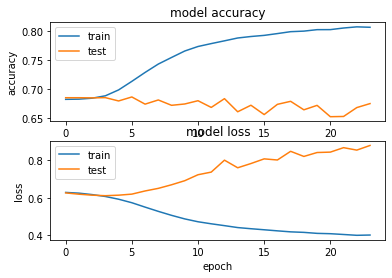

In [ ]:
import matplotlib.pyplot as plt  
plt.figure(1)  

# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  


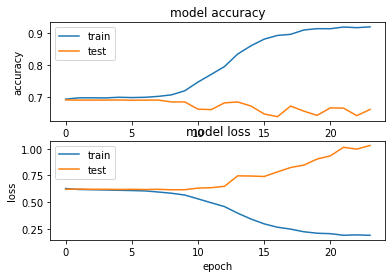

In [ ]:
import matplotlib.pyplot as plt  
plt.figure(1)  

# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  
